In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# Check if the available data fit a 2D Gaussian function.
def gaussian_2d(X, A, mu_x, mu_y, sigma):
    x, y = X
    return A * np.exp(-((x - mu_x)**2 + (y - mu_y)**2) / (2 * sigma**2))

In [3]:
input_values = np.array([
    [0.65, 0.65],
    [0.42042, 0.984249],
    [0.778188, 0.145792],
    [0.693481, 0.466855],
    [0.693481, 0.466855],
    [0.593195, 0.233834],
    [0.645, 0.645],
    [0.6455, 0.0681],
    [0.6495, 0.681],
    [0.65005, 0.681],
    [0.646995, 0.72639],
    [0.956808, 0.801514],
    [0.078257, 0.869866],
    [0.644825, 0.694601],
    [0.645005, 0.645005],
    [0.645005, 0.644999],
    [0.575511, 0.243243],
    [0.257105, 0.829082],
    [0.338415, 0.301335],
    [0.748357, 0.288272],
    [0.644995, 0.644995],
    [0.644996, 0.644996],
    [0.644996, 0.644995],
    [0.644995, 0.644996],
    [0.31940389, 0.76295937],
    [0.57432921, 0.8798981],
    [0.73102363, 0.73299988],
    [0.84035342, 0.26473161],
    [0.65011406, 0.68152635],
    [0.41043714, 0.1475543],
    [0.31269116, 0.07872278],
    [0.68341817, 0.86105746],
    [0.08250725, 0.40348751],
    [0.88388983, 0.58225397],
    [0.90048221, 0.46996691],
    [0.86243528, 0.4352856],
    [0.09311333, 0.31520745],
    [0.48975434, 0.16844847],
    [0.90132685, 0.67366454],
    [0.32101719, 0.63497061],
    [0.32044659, 0.42030664],
    [0.63861791, 0.73839723],
    [0.59648578, 0.61407967],
    [0.48366726, 0.31942835],
    [0.96227495, 0.90831843],
    [0.46937596, 0.55313941],
    [0.06938944, 0.62671938],
    [0.59640851, 0.81673367],
    [0.1409109, 0.3179331],
    [0.58653471, 0.20732755],
    [0.61533925, 0.18320905],
    [0.9068703, 0.76151747],
    [0.58038966, 0.57243686],
    [0.55684911, 0.58265192]
])


output_values = np.array([
    1.95740562e-001, 7.91014794e-120, -2.40774083e-144,
    -1.34927223e-021, -1.34927223e-021, 3.15411552e-046,
    5.25792017e-001, -5.62662183e-125, -4.07933817e-003,
    -3.83260650e-003, -1.36552524e-007, 2.90754060e-096,
    6.63330545e-223, -8.47726599e-004, 5.25352485e-001,
    5.25616151e-001, 1.81155929e-039, 3.38810941e-125,
    -1.37965930e-016, 1.32089484e-087, 5.26231765e-001,
    5.26143798e-001, 5.26187780e-001, 5.26187780e-001,
    1.32267704e-079, 1.03307824e-046, 7.71087511e-016,
    3.34177101e-124, -3.60606264e-003, -2.15924904e-054,
    -2.08909327e-091, 2.53500115e-040, 3.60677119e-081,
    6.22985647e-048, -3.23831206e-070, -2.66554974e-065,
    -6.53456227e-084, 1.33208482e-048, 2.94212475e-055,
    8.33516100e-040, -5.03981978e-008, -2.01007653e-009,
    6.59147585e-002, 5.59549084e-011, 4.50954445e-133,
    -4.05280070e-015, -7.40958578e-118, 8.49132032e-027,
    -8.80550875e-064, -9.89621108e-052, -2.68384158e-067,
    1.19343278e-067, 6.90381175e-005, 4.65270195e-006
])

In [5]:
# Take only positive values for fitting
# TODO: Would this assumption impact the actual distribution
mask = output_values > 0
input_values = input_values[mask]
output_values = output_values[mask]

In [6]:
# Carry out curve fitting
popt, _ = curve_fit(gaussian_2d, (input_values[:, 0], input_values[:, 1]), output_values, p0=[1, 0.65, 0.65, 0.1])

# mu_x and mu_y are what we're interested in
A, mu_x, mu_y, sigma = popt
A, mu_x, mu_y, sigma

(2.0713393399993, 0.6294092003797551, 0.628534990196193, 0.01369339364650577)

In [17]:
# Calculate the predicted values
predicted_values = gaussian_2d((input_values[:, 0], input_values[:, 1]), A, mu_x, mu_y, sigma)

# Calculate residuals
residuals = output_values - predicted_values

# Calculate R-squared value
ss_res = np.sum(residuals**2)
ss_tot = np.sum((output_values - np.mean(output_values))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared
# Oooh - look at the fit

0.9999999966605997

Great fitting!

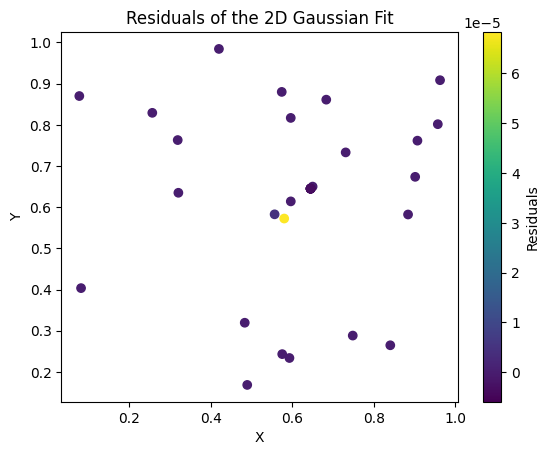

In [18]:
# Plot the residuals
plt.figure()
plt.scatter(input_values[:, 0], input_values[:, 1], c=residuals, cmap='viridis', marker='o')
plt.colorbar(label='Residuals')
plt.title('Residuals of the 2D Gaussian Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Yellow Dot is what we're after.

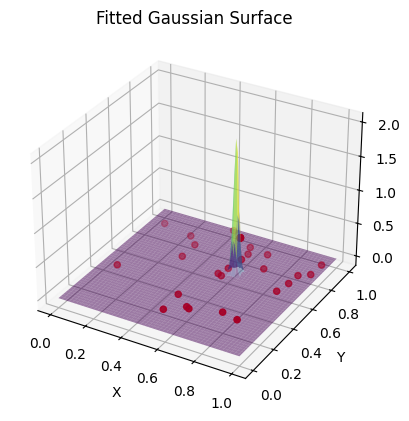

In [19]:
# Plot the fitted surface
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
x, y = np.meshgrid(x, y)
z = gaussian_2d((x, y), A, mu_x, mu_y, sigma)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.5)
ax.scatter(input_values[:, 0], input_values[:, 1], output_values, color='r')
ax.set_title('Fitted Gaussian Surface')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Looks like pretty neat tower. But still there's one person who's got better point than this. I must be missing something here. 
